# 데이터 준비

In [1]:
import numpy as np
import tqdm
import os
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
train_x = []
train_y = []
eval_x = []
eval_y = []

csv_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/data/fer2013.csv'

with open(csv_path) as f:
  for line in tqdm.tqdm(f.read().splitlines()[1:]):
    emotion, pixels, usage = line.split(',')
    
    x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
    y = int(emotion)

    if usage == 'PrivateTest':
      eval_x.append(x)
      eval_y.append(y)
    else:
      train_x.append(x)
      train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:26<00:00, 1367.49it/s]

train : 32298, eval :3589


Angry


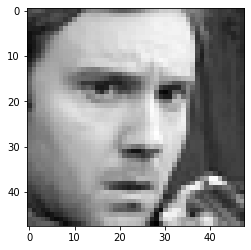

In [3]:
LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

# Model

In [17]:
# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 1), weights=None, classes=7)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
history = model.fit(np.stack(train_x),
          tf.keras.utils.to_categorical(train_y),
          epochs=100,
          batch_size=512,
          validation_data=(np.stack(eval_x),
                           tf.keras.utils.to_categorical(eval_y)))

Epoch 1/100
64/64 [==============================] - 7s 108ms/step - loss: 1.8238 - categorical_accuracy: 0.2497 - val_loss: 1.9353 - val_categorical_accuracy: 0.2449
Epoch 2/100
64/64 [==============================] - 6s 101ms/step - loss: 1.6711 - categorical_accuracy: 0.3336 - val_loss: 1.9198 - val_categorical_accuracy: 0.2449
Epoch 3/100
64/64 [==============================] - 6s 95ms/step - loss: 1.5541 - categorical_accuracy: 0.3956 - val_loss: 1.9075 - val_categorical_accuracy: 0.2449
Epoch 4/100
64/64 [==============================] - 6s 96ms/step - loss: 1.4523 - categorical_accuracy: 0.4428 - val_loss: 1.8995 - val_categorical_accuracy: 0.2449
Epoch 5/100
64/64 [==============================] - 6s 93ms/step - loss: 1.3820 - categorical_accuracy: 0.4725 - val_loss: 1.8977 - val_categorical_accuracy: 0.2449
Epoch 6/100
64/64 [==============================] - 6s 95ms/step - loss: 1.2999 - categorical_accuracy: 0.5091 - val_loss: 1.8985 - val_categorical_accuracy: 0.1655
Ep

64/64 [==============================] - 6s 90ms/step - loss: 0.1687 - categorical_accuracy: 0.9411 - val_loss: 2.2327 - val_categorical_accuracy: 0.1744
Epoch 49/100
64/64 [==============================] - 6s 93ms/step - loss: 0.1609 - categorical_accuracy: 0.9438 - val_loss: 2.2638 - val_categorical_accuracy: 0.1744
Epoch 50/100
64/64 [==============================] - 6s 93ms/step - loss: 0.1406 - categorical_accuracy: 0.9515 - val_loss: 2.2266 - val_categorical_accuracy: 0.1655
Epoch 51/100
64/64 [==============================] - 6s 89ms/step - loss: 0.1969 - categorical_accuracy: 0.9319 - val_loss: 2.2616 - val_categorical_accuracy: 0.1814
Epoch 52/100
64/64 [==============================] - 6s 86ms/step - loss: 0.1217 - categorical_accuracy: 0.9592 - val_loss: 2.2808 - val_categorical_accuracy: 0.1477
Epoch 53/100
64/64 [==============================] - 6s 86ms/step - loss: 0.2313 - categorical_accuracy: 0.9214 - val_loss: 2.1611 - val_categorical_accuracy: 0.1744
Epoch 54/10

64/64 [==============================] - 7s 104ms/step - loss: 0.1974 - categorical_accuracy: 0.9348 - val_loss: 4.9271 - val_categorical_accuracy: 0.4308
Epoch 98/100
64/64 [==============================] - 7s 107ms/step - loss: 0.1848 - categorical_accuracy: 0.9369 - val_loss: 5.4661 - val_categorical_accuracy: 0.4260
Epoch 99/100
64/64 [==============================] - 7s 105ms/step - loss: 0.1036 - categorical_accuracy: 0.9641 - val_loss: 5.1025 - val_categorical_accuracy: 0.4330
Epoch 100/100
64/64 [==============================] - 7s 104ms/step - loss: 0.1150 - categorical_accuracy: 0.9602 - val_loss: 5.3514 - val_categorical_accuracy: 0.4274


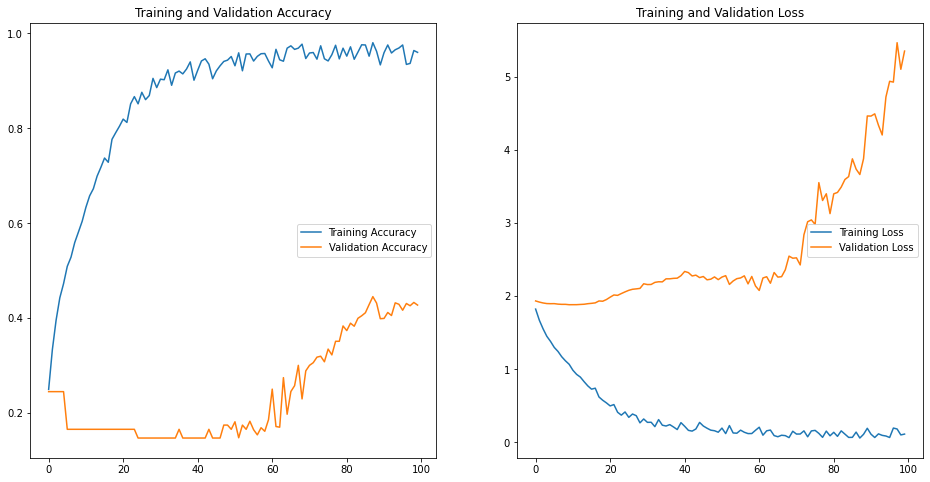

In [18]:
acc = history.history['categorical_accuracy']
val_categorical_acc = history.history['val_categorical_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = 100
epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_categorical_acc, label='Validation Accuracy')
plt.legend(loc='right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='right')
plt.title('Training and Validation Loss')
plt.show()

# 모델 convert

In [19]:
import os
model_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/model.h5'
model.save(model_path)

In [ ]:
tensorflowjs_converter 를 활용해 우리가 저장한 모델을 Tensorflow.js가 활용할 수 있는 형태로 변환해 주어야 합니다. 우선 아래와 같이 tensorflowjs를 설치해 줍니다.

$ pip install tensorflowjs

저장한 모델을 TensorFlow.js로 변환하는 작업은 간단합니다. 터미널에서 tensorflowjs_converter 명령어만 실행하면 됩니다. 

$ cd ~/aiffel/tfjs_mobile
$ tensorflowjs_converter --input_format=keras model.h5 model

이후 ~/aiffel/tfjs_mobile/model 디렉토리에 model.json 및 모델 파일들이 정상적으로 생성되었음을 확인해 봅시다.